In [1]:
import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from scipy.stats import mode
pd.options.display.max_columns = 100

import warnings
warnings.filterwarnings('ignore')

import random
from datetime import datetime


# 2. Разделение датасета
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

# 4. Метрики качества
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

### 1. Загрузка датасета и оптимизация типов данных
Импортируем набор данных для обучения модели - в выборке 10 тыс. наблюдений и 20 столбцов. Целевая переменная price (цена квартиры), есть столбцы индексов районов и квартир, которые необходимо привести к строковому типу. Одновременно оптимизируем типы данных, т.к. есть целочисленные значения значения с типом float64

In [2]:
TRAIN_DATASET_PATH = './real_estate/train.csv'
train_df = pd.read_csv(TRAIN_DATASET_PATH, sep=',')
train_df.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
5,5804,99,3.0,62.528465,47.103833,6.0,9,9.0,1972,0.012339,B,B,35,5776,1,2078.0,2,4,B,161044.944138
6,8864,44,1.0,33.938750,21.772930,9.0,1,12.0,1968,0.232205,B,B,24,4860,1,80.0,0,3,B,142402.739272
7,13072,59,2.0,50.391814,32.893256,8.0,8,17.0,1986,0.019509,B,B,37,7687,11,176.0,5,5,B,326174.175191
8,9951,1,1.0,46.887892,44.628132,1.0,12,20.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,160400.401732
9,8094,6,3.0,79.867477,75.085125,1.0,3,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,194756.023945


In [3]:
TEST_DATASET_PATH = './real_estate/test.csv'
test_df = pd.read_csv(TEST_DATASET_PATH, sep=',')
test_df.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
2,960,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B
4,746,74,1.0,53.837056,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B
5,868,38,3.0,87.139994,53.180419,10.0,4,23.0,2011,0.060753,B,B,15,2787,2,520.0,0,7,B
6,672,62,1.0,46.269456,22.820239,11.0,8,17.0,2014,0.072158,B,B,2,629,1,NaN,0,0,A
7,2471,2,2.0,48.172969,29.924204,6.0,4,9.0,1974,0.000000,B,B,33,7425,1,NaN,2,5,B
8,4510,1,1.0,43.153761,21.017596,9.0,10,17.0,2014,0.007122,B,B,1,264,0,NaN,0,1,B
9,8354,62,2.0,62.593787,59.786844,10.0,1,16.0,1981,0.002212,B,B,39,7614,3,NaN,1,5,A


In [4]:
train_df.shape, test_df.shape

((10000, 20), (5000, 19))

In [5]:
train_df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

Приведем столбец индекса квартиры и индекса района к строковому типу

In [6]:
train_df['Id'] = train_df['Id'].astype(str)
train_df['DistrictId'] = train_df['DistrictId'].astype(str)

test_df['Id'] = test_df['Id'].astype(str)
test_df['DistrictId'] = test_df['DistrictId'].astype(str)

Оптимизируем типы данных и уменьшим занимаемый объем памяти

In [7]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
#                 if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
#                     df[col] = df[col].astype(np.float16)
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [8]:
train_df = reduce_mem_usage(train_df)
test_df = reduce_mem_usage(test_df)

Memory usage of dataframe is 1.34 MB
Memory usage after optimization is: 0.72 MB
Decreased by 46.2%
Memory usage of dataframe is 0.63 MB
Memory usage after optimization is: 0.33 MB
Decreased by 46.9%


После оптимизации типов объем занимаемой памяти сократился на 46%, строковые переменные также были переформатированы в тип object

In [9]:
train_df.dtypes

Id               category
DistrictId       category
Rooms             float32
Square            float32
LifeSquare        float32
KitchenSquare     float32
Floor                int8
HouseFloor        float32
HouseYear           int32
Ecology_1         float32
Ecology_2        category
Ecology_3        category
Social_1             int8
Social_2            int16
Social_3            int16
Healthcare_1      float32
Helthcare_2          int8
Shops_1              int8
Shops_2          category
Price             float32
dtype: object

#### 2. Анализ признаков
Обзор колличественных переменных показал, что есть пробелы в признаках LifeSquare (жилая площадь) и Helthcare_1 (отсутствуют данные в половине наблюдений). Придется отказаться от Helthcare_1 из-за большого числа пропусков значений

In [332]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315777,37.199646,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904419,1.319500,4.231300,214138.859375
std,0.839512,21.058731,86.241211,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517273,1.493601,4.806341,92872.289062
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.777344
25%,1.000000,41.774879,22.769833,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.628906
50%,2.000000,52.513309,32.781261,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.648438
75%,2.000000,65.900627,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.460938
max,19.000000,641.065186,7480.592285,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.437500


Много пропусков в Helthcare_1, придется отказаться от этого признака.
Есть некорректно заполненные строки как например максимум по признаку LifeSquare - некорректные и жилая площадь (которая больше общей площади). Так как не очень понятно будем ли вообще использовать столбец LifeSquare пока оставляем.

In [333]:
train_df.loc[(train_df["LifeSquare"] > 300)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
5183,15886,85,3.0,78.059334,461.463623,10.0,12,16.0,1998,0.037178,B,B,52,11217,1,2300.0,1,7,B,394253.312500
7010,2307,102,1.0,409.425171,410.639740,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,705.0,3,6,B,90470.429688
8000,16550,27,3.0,81.694420,7480.592285,1.0,9,17.0,2016,0.017647,B,B,2,469,0,NaN,0,0,B,217357.500000
9229,11602,30,2.0,641.065186,638.163208,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,1046.0,3,23,B,133529.687500


По признаку общей площади Square также есть выбросы, т.к. таких всего 15 наблюдений - можно бы было удалить, но т.к.в итоговом датасете необходимы предсказания для всех наблюдений - будем заменять медианами.

In [334]:
train_df.loc[(train_df["Square"] < 10) | (train_df["Square"] > 300)].shape[0]

15

Площадь кухни тоже необходимо обработать - больше 20% наблюдений с проставленной площадью = 1 кв.м. Возможно это квартиры студии, хотя наблюдения с проставленной нулевой площадью кухни тоже есть. Заменяем единичные значения на 3 кв.м и считаем медиану, делаем столбец метку для обозначения строк, где значения были заменены на медиану

In [335]:
train_df['KitchenSquare'].value_counts()

1.0       2460
8.0       1306
5.0       1169
10.0      1075
6.0       1038
9.0        843
0.0        697
7.0        609
12.0       249
11.0       233
13.0        67
14.0        51
4.0         39
15.0        31
3.0         22
16.0        16
20.0        14
17.0        12
19.0        11
18.0         6
2.0          4
22.0         3
43.0         2
112.0        2
41.0         2
32.0         2
58.0         2
25.0         2
37.0         2
30.0         2
51.0         2
40.0         1
96.0         1
48.0         1
72.0         1
73.0         1
2014.0       1
66.0         1
36.0         1
78.0         1
54.0         1
29.0         1
31.0         1
35.0         1
62.0         1
39.0         1
1970.0       1
60.0         1
75.0         1
26.0         1
21.0         1
84.0         1
63.0         1
123.0        1
53.0         1
42.0         1
23.0         1
27.0         1
Name: KitchenSquare, dtype: int64

In [336]:
train_df['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

Почти 20 % наблюдений с проставленным этажом квартиры больше, чем этажность дома.

In [338]:
train_df.loc[(train_df["Floor"] > train_df["HouseFloor"])]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
17,1190,8,2.0,49.396000,28.299601,5.0,6,5.0,1962,0.458174,B,A,26,4439,1,1130.0,1,5,B,186971.921875
19,367,45,1.0,42.367290,40.012527,1.0,16,14.0,2015,0.195781,B,B,23,5212,6,NaN,3,2,B,250466.984375
21,8471,20,3.0,75.611061,47.494621,8.0,11,9.0,1976,0.019509,B,B,37,7687,11,176.0,5,5,B,366916.250000
24,4717,27,1.0,44.203945,NaN,0.0,2,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,135466.562500
25,4521,6,2.0,65.409966,NaN,1.0,18,1.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,191205.265625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9960,16258,48,3.0,96.056786,98.152802,1.0,15,1.0,2017,0.041125,B,B,46,9515,5,NaN,1,10,B,524365.562500
9968,9920,1,3.0,86.487549,NaN,1.0,18,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,248248.937500
9970,13501,6,1.0,41.310417,19.117077,9.0,18,17.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,114878.828125
9975,4944,6,2.0,52.573132,NaN,1.0,18,17.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,154366.031250


Также есть выбросы, где подозрительно большое общее кол-во этажей в доме, т.к. не можем далить - делаем медианными и ставим метку выброса для для нулевых значений HouseFloor и там где этаж квартиры больше этажности дома. Для поля Floor нулевых значений или слишком высоких нет

In [339]:
train_df.loc[(train_df["HouseFloor"] > 50)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
746,9300,74,2.0,71.747871,74.579811,9.0,5,99.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,243329.90625
1678,78,30,2.0,65.773750,66.811790,1.0,8,117.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B,207248.37500
4657,10806,5,1.0,51.944588,48.709602,1.0,6,99.0,1977,0.150818,B,B,16,3433,4,2643.0,4,5,B,296127.12500


In [340]:
# В обучающей выборке почти 20% наблюдений, где этаж квартиры проставлен некорректно (больше этажности дома)
train_df.loc[(train_df["Floor"] > train_df["HouseFloor"])].shape[0]

1825

In [341]:
train_df.loc[(train_df["Rooms"] == 0) | (train_df["Rooms"] > 5)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
2004,5927,57,10.0,59.056976,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,NaN,5,15,B,317265.312500
2194,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,NaN,3,9,B,158998.109375
2728,14865,9,10.0,60.871265,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,30.0,2,4,B,172329.265625
3780,7317,27,0.0,41.790882,NaN,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,98129.976562
5894,770,28,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B,217009.343750
6088,8491,1,19.0,42.006046,21.779287,7.0,17,17.0,2014,0.007122,B,B,1,264,0,NaN,0,1,B,78364.617188
6401,9443,27,0.0,87.762619,85.125473,0.0,5,15.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,219281.921875
7644,7917,27,0.0,212.932358,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.250000
7929,456,6,0.0,81.491447,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,212864.796875
8794,14003,99,6.0,59.414333,38.702244,6.0,7,9.0,1969,0.033494,B,B,66,10573,1,1322.0,3,8,B,229661.968750


In [342]:
# Также есть выбросы по числу комнат
train_df.loc[(train_df["Rooms"] == 0) | (train_df["Rooms"] > 5)].shape[0]

12

В итоге обработку датасета можно представить как:

In [10]:
class DataPipeline:
    """Подготовка исходных данных"""
    
    def __init__(self):
        """Параметры класса"""
        self.medians = None
        self.kitchen_square_quantile = None
        self.avg_kitchen_percentage = None
        
    def fit(self, df):
        """Сохранение статистик"""
        
        # Расчет медиан
        self.medians = df.median()
        self.kitchen_square_quantile = df['KitchenSquare'].quantile(.975)
        self.avg_kitchen_percentage = ( df['KitchenSquare'] / df['Square'] ).median()
        
    def transform(self, df):
        """Трансформация данных"""
        
        # 1. Пропуски и выбросы
        
        # Healthcare_1
        
        #Обзор колличественных переменных показал, что есть пробелы в признаках LifeSquare (жилая площадь) 
        #и Helthcare_1 (отсутствуют данные в половине наблюдений). Придется отказаться от признака Helthcare_1 из-за 
        #большого числа пропусков значений
        
        if 'Healthcare_1' in df.columns:
            df.drop('Healthcare_1', axis=1, inplace=True)        
      
        # Square 
        df['Square_outlier'] = 0
        outliers_Square = ( (df["Square"] < 10 ) | (df['Square'] > 300) | 
                            df['LifeSquare'].isna() 
                           )               
        df.loc[outliers_Square, 'Square_outlier'] = 1
        df.loc[outliers_Square, 'Square'] = self.medians['Square'] 
        
        
         # KitchenSquare
        df['kitchen_outlier'] = 0        
               
        #Обрабатываем выбросы и заменяем площадь кухни в наблюдениях с очень большими/маленькими значениями
        #и где они составляют больше, чем 50% площади (скорее всего ошибочные наблюдения)
        #но значение, равное среднему % от площади квартиры
        
        outliers_kitchen = ( (df['KitchenSquare'] > self.kitchen_square_quantile) | (df['KitchenSquare'] < 4) |
                    (df['KitchenSquare'] > 0.5 * df['Square']) 
                           )
        
        df.loc[outliers_kitchen, 'kitchen_outlier'] = 1       
        
        df.loc[outliers_kitchen, 'KitchenSquare'] = self.avg_kitchen_percentage * df['Square']  
        
        
        # LifeSquare 
        df['LifeSquare_outlier'] = 0
        
        #По признаку общей площади Square также есть выбросы, таких всего 15 наблюдений, но удалить их не можем, 
        #заменяем на медианные значения
        #df = df[(df['Square'] < 300) & (df['Square'] > 10)].reset_index(drop=True)
        
        outliers_LSquare = ( (df["LifeSquare"] > df["Square"]) | (df['Square'] > 300) | 
                            (df['Square'] < 10) | df['LifeSquare'].isna() 
                           )  
        df.loc[outliers_LSquare, 'LifeSquare_outlier'] = 1        
        df.loc[outliers_LSquare, 'LifeSquare'] = df.loc[outliers_LSquare, 'Square'] \
                                                - df.loc[outliers_LSquare, 'KitchenSquare'] - 3       
        
               
        # HouseFloor
        #Так как удалять некорректные значения в финальной выборке мы не можем, заменяем на медианные значения
        #df = df[(df["HouseFloor"] < 50)].reset_index()  
        df['floor_outlier'] = 0
               
        outliers_floor = ( (df['HouseFloor'] == 0) | (df["HouseFloor"] > 50) | (df['Floor'] > df['HouseFloor']) )
        df.loc[outliers_floor, 'floor_outlier'] = 1
        df.loc[outliers_floor, 'HouseFloor'] = self.medians['HouseFloor']  
                
        # В обучающей выборке 535 наблюдений, где этаж квартиры проставлен некорректно (болше этажности дома)
        # Проставим для них рандомные значения в пределах этажности дома
        random_floor = (df["Floor"] > df["HouseFloor"])
        df.loc[random_floor, 'floor_outlier'] = 1
        df.loc[random_floor, 'Floor'] = np.floor(df['HouseFloor']* random.uniform(0, 1))

        # Rooms
        #Много наблюдений с числом комнат = 1 и большой площадью. Приравнивать их к медианным не очень хорошо, т.к. это
        #могут быть квартиры свободной планировки с большой площадью
        #Медианами заменим только очевидные выбросы, где нулевое число комнат или очень большое
        
        df['Rooms_outlier'] = 0
        outliers_rooms =( (df['Rooms'] == 0) | (df['Rooms'] > 5) )
        df.loc[outliers_rooms, 'Rooms_outlier'] = 1    
        
        df.loc[df['Rooms'] == 0, 'Rooms'] = 1
        df.loc[df['Rooms'] > 5, 'Rooms'] = self.medians['Rooms']  
        
        df['one_room'] = 0
        one_room =( (df['Rooms'] == 1) & (df['Square'] > 50) )
        df.loc[one_room, 'one_room'] = 1           
        
                
        # HouseYear
        #Есть наблюдения с годом постройки больше текущего, заменяем на текущий год
        cur_year = datetime.now().year
        df['year_outlier'] = 0       
        df.loc[df['HouseYear'] > cur_year, 'year_outlier'] = 1        
        df.loc[df['HouseYear'] > cur_year, 'HouseYear'] = cur_year
        
              
           
        return df

In [11]:
class FeatureGenetator():
        
    def __init__(self):
        self.district_size = None
        self.med_price_by_district = None
        self.med_price_by_district_median = None
        
        self.med_sqmprice_by_room_district = None
        self.med_sqmprice_by_room_district_median = None
        
    def fit(self, X, y=None):
        
        #DistrictSize
        X = X.copy()
        
        self.district_size = pd.DataFrame(X['DistrictId'].value_counts().reset_index().\
                                         rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'}) )
        #MedPriceByDistrict        
        df = X.copy()
        
        if y is not None:
            df['Price'] = y.values
            
        self.med_price_by_district = df.groupby(['DistrictId', 'Rooms']).agg({'Price':'median'}).\
                                        rename(columns={'Price':'MedPriceByDistrict'})
        self.med_price_by_district_median = self.med_price_by_district['MedPriceByDistrict'].median()
        
        #MedSqmPricebyRoomNumber
        sq = X.copy()
        if y is not None:
            sq['Price'] = y.values
            sq['PricePerSqm'] = sq['Price'] / sq['Square'] 
        
        self.med_sqmprice_by_room_district = sq.groupby(['DistrictId', 'Rooms']).agg({'PricePerSqm':'median'}).\
                                        rename(columns={'PricePerSqm':'MedPriceBySqm'})        
        self.med_sqmprice_by_room_district_median = self.med_sqmprice_by_room_district['MedPriceBySqm'].median()  

        

    def transform(self, df):
        
        binary_to_numbers = {'A': 0, 'B': 1}

        df[['Ecology_2', 'Ecology_3', 'Shops_2']] = df[['Ecology_2', 'Ecology_3', 'Shops_2']].replace(binary_to_numbers)
       
        # age_category
        df['age_category'] = 0
        df.loc[df['HouseYear'] >= 2015, 'age_category'] = 0
        df.loc[(df['HouseYear'] >= 2010) & (df['HouseYear'] < 2015), 'age_category'] = 1
        df.loc[(df['HouseYear'] >= 2000) & (df['HouseYear'] < 2010), 'age_category'] = 2
        df.loc[(df['HouseYear'] >= 1980) & (df['HouseYear'] < 2000), 'age_category'] = 3
        df.loc[(df['HouseYear'] >= 1950) & (df['HouseYear'] < 1970), 'age_category'] = 4
        df.loc[ (df['HouseYear'] < 1950), 'age_category'] = 5
        
        
        # housefloor_category  
        df['housefloor_category'] = 0

        df.loc[df['HouseFloor'] < 4, 'housefloor_category'] = 0
        df.loc[(df['HouseFloor'] >= 4) & (df['HouseFloor'] < 10), 'housefloor_category'] = 1
        df.loc[(df['HouseFloor'] >= 10) & (df['HouseFloor'] < 15), 'housefloor_category'] = 2
        df.loc[(df['HouseFloor'] >= 15), 'housefloor_category'] = 3
        
        # DistrictSize 
        
        df = df.merge(self.district_size, on='DistrictId', how='left')
        df['DistrictSize'].fillna(random.randint(3, 9), inplace=True)
        
        df['IsDistrictLarge'] = (df['DistrictSize'] > 100).astype(int)
        
        #MedPriceByDistrict 
        
        if self.med_price_by_district is not None:
            df = df.merge(self.med_price_by_district, on=['DistrictId', 'Rooms'], how='left')       

        df['MedPriceByDistrict'].fillna(self.med_price_by_district_median, inplace=True)        

        #MedSqmPricebyRoomNumber
        if self.med_sqmprice_by_room_district is not None:
            df = df.merge(self.med_sqmprice_by_room_district, on=['DistrictId', 'Rooms'], how='left')       

        df['MedPriceBySqm'].fillna(self.med_sqmprice_by_room_district_median, inplace=True)            
        
        # SquarePerRoom        
        df['SquarePerRoom'] = df['Square'] / df['Rooms'] 
        
        # IslastFloor 
        df['IsLastFloor'] = 0
        df.loc[df['HouseFloor'] == df['Floor'], 'IsLastFloor'] = 1
        
        return df

In [12]:
pipe = DataPipeline()
pipe.fit(train_df)
train_df = pipe.transform(train_df)
test_df = pipe.transform(test_df)

In [13]:
features_gen = FeatureGenetator()
features_gen.fit(train_df.drop(columns='Price'), train_df['Price'])

train_df = features_gen.transform(train_df)
test_df = features_gen.transform(test_df)

In [14]:
train_df['IsLastFloor'].value_counts()

0    8987
1    1013
Name: IsLastFloor, dtype: int64

In [15]:
train_df.count()

Id                     10000
DistrictId             10000
Rooms                  10000
Square                 10000
LifeSquare             10000
KitchenSquare          10000
Floor                  10000
HouseFloor             10000
HouseYear              10000
Ecology_1              10000
Ecology_2              10000
Ecology_3              10000
Social_1               10000
Social_2               10000
Social_3               10000
Helthcare_2            10000
Shops_1                10000
Shops_2                10000
Price                  10000
Square_outlier         10000
kitchen_outlier        10000
LifeSquare_outlier     10000
floor_outlier          10000
Rooms_outlier          10000
one_room               10000
year_outlier           10000
age_category           10000
housefloor_category    10000
DistrictSize           10000
IsDistrictLarge        10000
MedPriceByDistrict     10000
MedPriceBySqm          10000
SquarePerRoom          10000
IsLastFloor            10000
dtype: int64

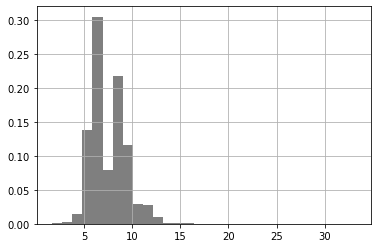

In [16]:
# После обработки выбросов поле "KitchenSquare" имеет более красивую гистограмму распределения

plt.figure()
train_df["KitchenSquare"].hist(color='k', bins=30, density=True, label='class 1', alpha=0.5)

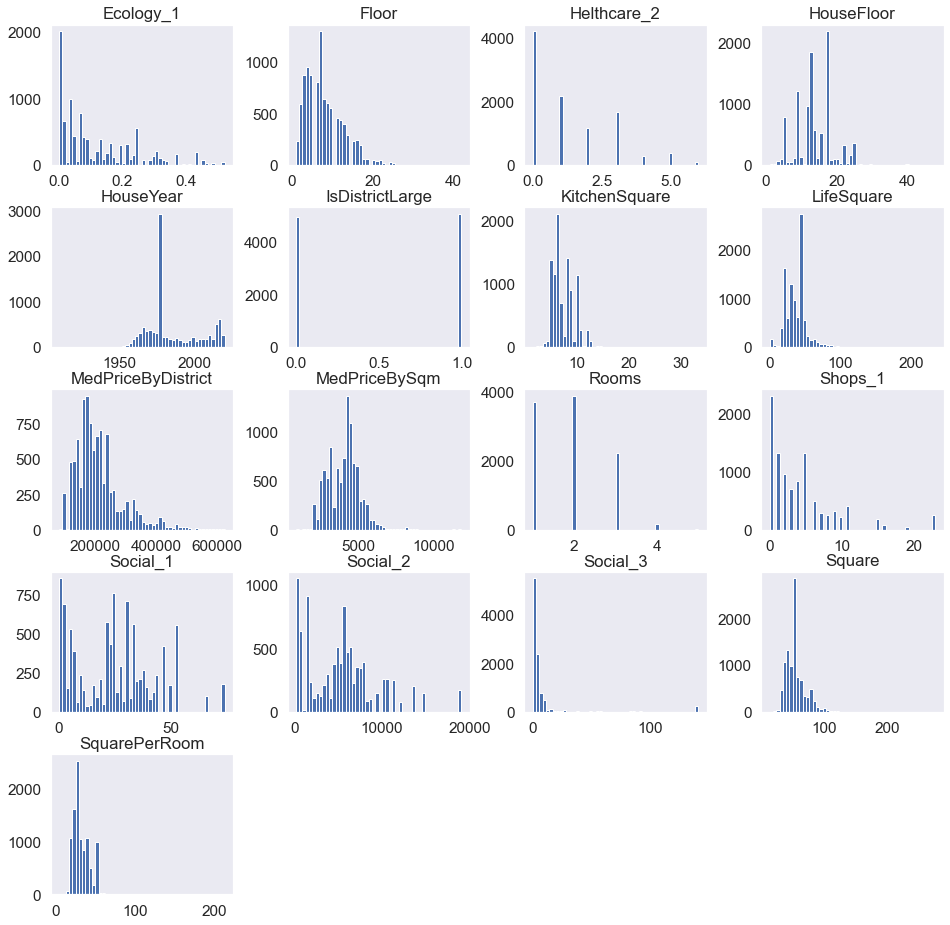

In [368]:
df_num_features = train_df.select_dtypes(include=['float64', 'float32', 'float16', 'int8', 'int16', 'int32'])
df_num_features.drop('Price', axis=1, inplace=True)
# df_num_features.drop('LifeSquare', axis=1, inplace=True)
df_num_features.hist(figsize=(16,16), bins=50, grid=False);

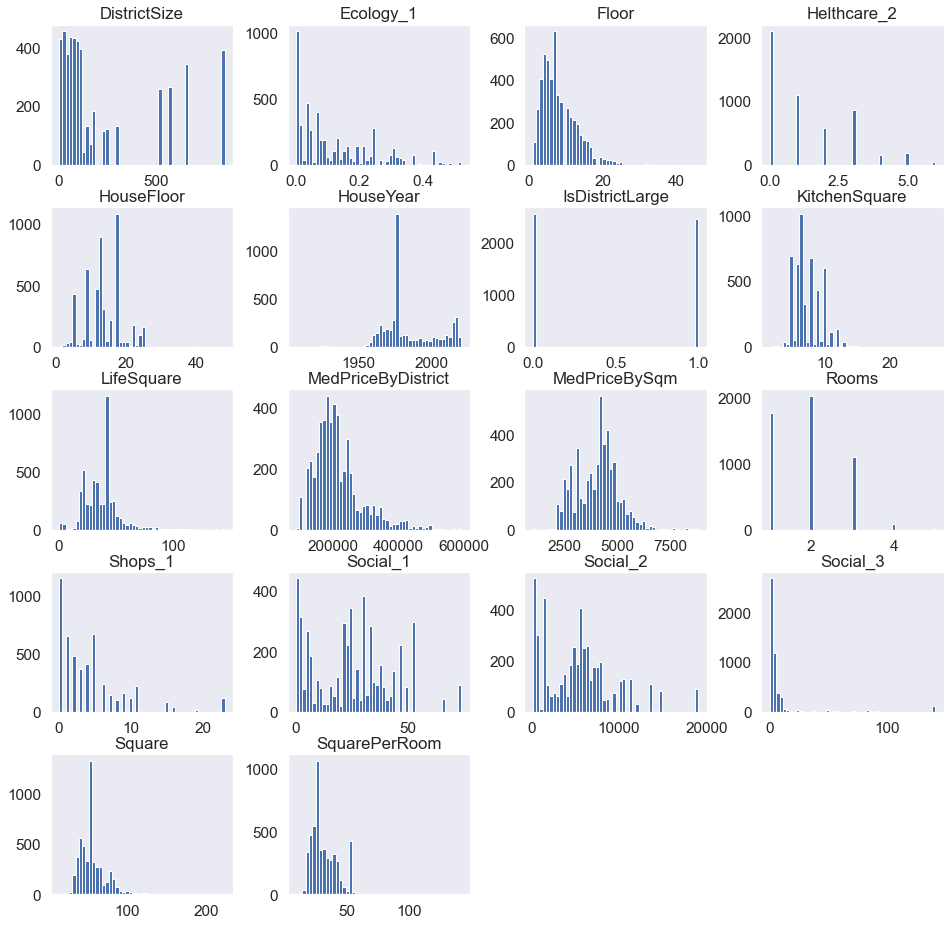

In [369]:
df_num_features_test = test_df.select_dtypes(include=['float64', 'float32', 'float16', 'int8', 'int16', 'int32'])
df_num_features_test.hist(figsize=(16,16), bins=50, grid=False);

In [370]:
#Проверяем, что пропущенных значений не осталось
test_df.isnull().sum()

Id                     0
DistrictId             0
Rooms                  0
Square                 0
LifeSquare             0
KitchenSquare          0
Floor                  0
HouseFloor             0
HouseYear              0
Ecology_1              0
Ecology_2              0
Ecology_3              0
Social_1               0
Social_2               0
Social_3               0
Helthcare_2            0
Shops_1                0
Shops_2                0
Square_outlier         0
kitchen_outlier        0
LifeSquare_outlier     0
floor_outlier          0
Rooms_outlier          0
one_room               0
year_outlier           0
age_category           0
housefloor_category    0
DistrictSize           0
IsDistrictLarge        0
MedPriceByDistrict     0
MedPriceBySqm          0
SquarePerRoom          0
IsLastFloor            0
dtype: int64

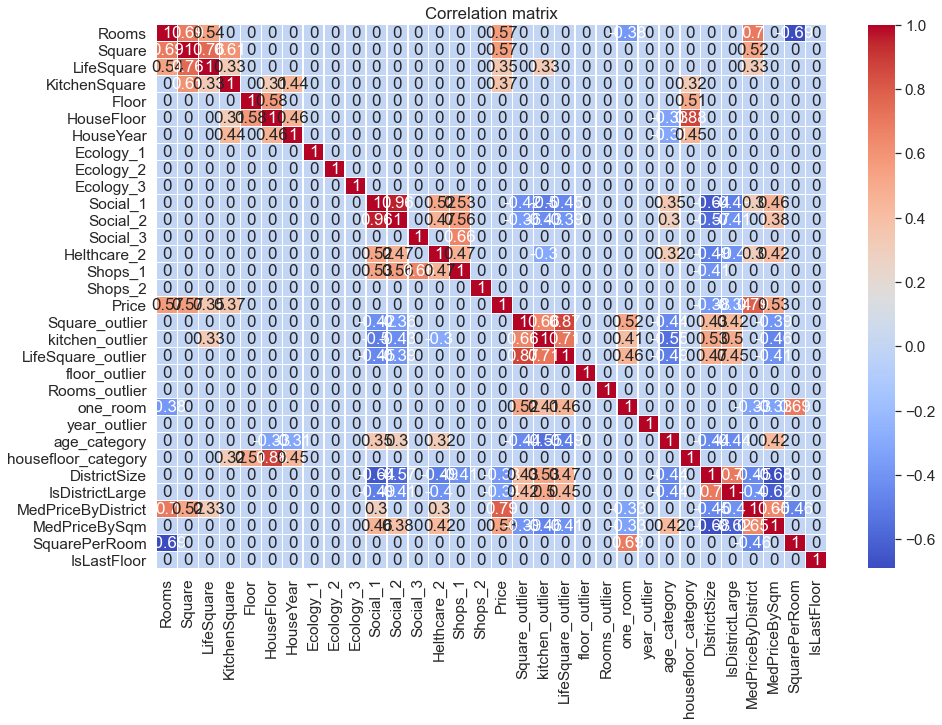

In [371]:
# Sosial_1 и 2 сильно коррелируют, оставим один из них. Shops1 и Social тоже коррелируют, но в меньшей степени. 
# По матрице видна сильная положительная зависимость цены от первых нескольких признаков (числа комнат, площадей),
# А также отрицательная зависимость от сгенерированного признака - числа квартир в данном районе 
#(чем больше число предложений в районе, тем ниже может быть цена)

plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = train_df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

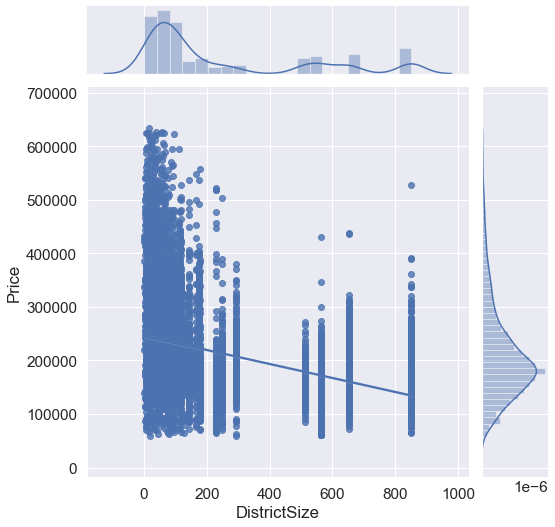

In [372]:
grid = sns.jointplot(train_df['DistrictSize'], train_df['Price'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

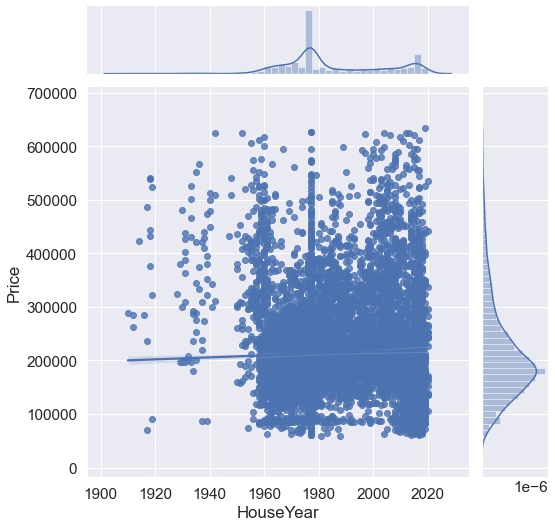

In [373]:
grid = sns.jointplot(train_df['HouseYear'], train_df['Price'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

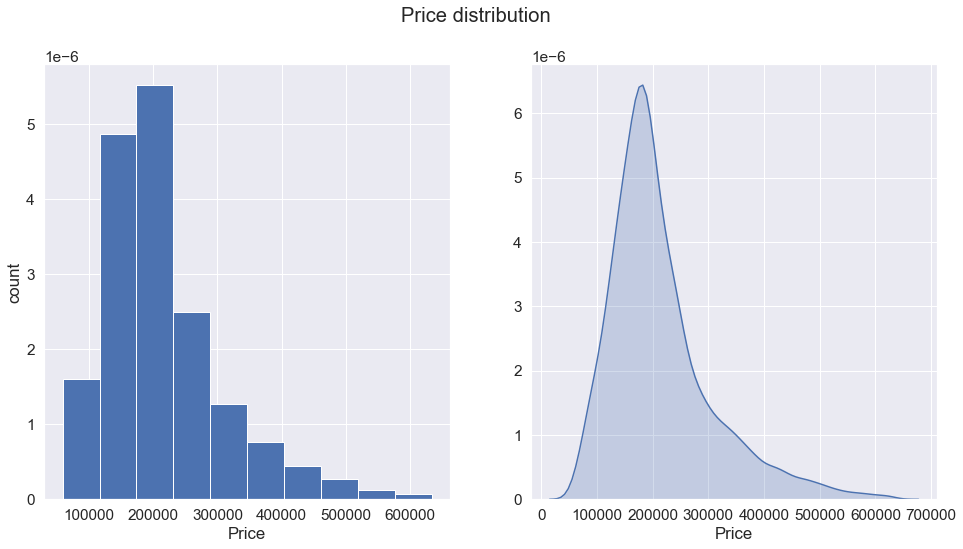

In [374]:
# Распределение целевой переменной - много квартир со средним значением цены и также есть хвост с более высокими значениями
plt.figure(figsize = (16, 8))

plt.subplot(121)
train_df['Price'].hist(density=True)
plt.ylabel('count')
plt.xlabel('Price')

plt.subplot(122)
sns.kdeplot(train_df['Price'], shade=True, legend=False)
plt.xlabel('Price')

plt.suptitle('Price distribution')
plt.show()

In [375]:
train_df.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'Square_outlier',
 'kitchen_outlier',
 'LifeSquare_outlier',
 'floor_outlier',
 'Rooms_outlier',
 'one_room',
 'year_outlier',
 'age_category',
 'housefloor_category',
 'DistrictSize',
 'IsDistrictLarge',
 'MedPriceByDistrict',
 'MedPriceBySqm',
 'SquarePerRoom',
 'IsLastFloor']

Отбор признаков - после нескольких итераций и оценок моделей были выбраны feature_main признаки (т.к. некоторые признаки сильно коррелировали между собой, некоторые не имели зависимости с ценой). Ecology_2 и Ecology_3 не показывали сильной зависимости с ценой квартири мало влияли на качество моделей, поэтому использовался только признак Ecology_1

In [17]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3',
                 'Helthcare_2', 'Shops_1', 'Shops_2']

new_feature_names = ['kitchen_outlier', 'floor_outlier', 'Rooms_outlier', 'one_room', 'LifeSquare_outlier', 
                     'housefloor_category', 'housefloor_category', 'DistrictSize',  'IsDistrictLarge', 
                     'MedPriceByDistrict', 'SquarePerRoom','HighFloor', 'LastFloor', 'MedPriceBySqm']

feature_main = ['Rooms', 'Square', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'age_category',
                'Ecology_1', 'Social_1', 'Social_3', 'Helthcare_2', 'Shops_2', 'housefloor_category', 
                'SquarePerRoom', 'IsDistrictLarge', 'MedPriceByDistrict', 'MedPriceBySqm', 'one_room']
target_name = 'Price'

In [71]:
# Разбиение на train / test
X = train_df[feature_main]

#X = train_df[feature_names + new_feature_names]
y = train_df[target_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=27)

# test_df = test_df[feature_names + new_feature_names]

In [72]:
def evaluate_preds(true_values, pred_values, save=False):
    """Оценка качества модели и график preds vs true"""
    
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3))
         )
    
    plt.figure(figsize=(8,8))
    
    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([0, 500000], [0, 500000], linestyle='--', color='black')  # диагональ, где true_values = pred_values
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    
    if save == True:
        plt.savefig(REPORTS_FILE_PATH + 'report.png')
    plt.show()

R2:	0.699
RMSE:	50659.889
MSE:	2566424364.656


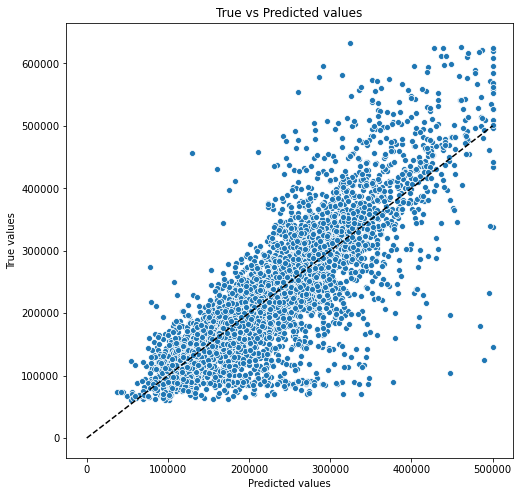

In [73]:
# Простая линейная регрессия дала оценку r2 (~0,7)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_train_preds = lr_model.predict(X_train)
# Постпроцессинг
y_train_preds = np.clip(y_train_preds, a_min=10000, a_max=500000)

evaluate_preds(y_train, y_train_preds)

R2:	0.689
RMSE:	52388.477
MSE:	2744552533.173


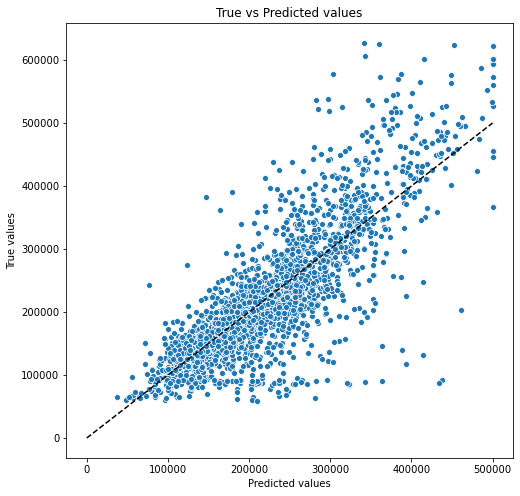

In [74]:
y_test_preds = lr_model.predict(X_test)

y_test_preds = np.clip(y_test_preds, a_min=10000, a_max=500000)
evaluate_preds(y_test, y_test_preds)

In [75]:
check_test = pd.DataFrame({
    "y_test": y_test,
    "y_pred": y_test_preds.flatten(),
})

check_test.head(10)

,y_test,y_pred
1208,115342.226562,159338.351714
4426,125107.867188,180116.851129
4730,156717.718750,144967.752308
2912,188075.031250,216175.713013
2618,126925.796875,144392.761550
337,187899.218750,138968.831815
8632,78606.773438,83601.575039
1278,205723.125000,205550.088799
2052,105055.171875,115263.921606
1811,240067.359375,237460.263883


In [ ]:
#Подбор парамеров для модели случайного леса
#parameters = {
#     'n_estimators': [100, 150, 200],
#     'max_features': [6, 7, 8, 9, 10, 11],
#     'max_depth': [10, 13, 16, 20]
#    , 'min_samples_leaf': [20, 25, 30, 35, 40],
# }

#clf = GridSearchCV(
#     estimator=RandomForestRegressor(),
#     param_grid=parameters,
#     scoring='r2',
#     cv=5,
# )

In [48]:
#clf.fit(X_train, y_train)

In [49]:
#clf.best_params_

R2:	0.914
RMSE:	27069.97
MSE:	732783300.337


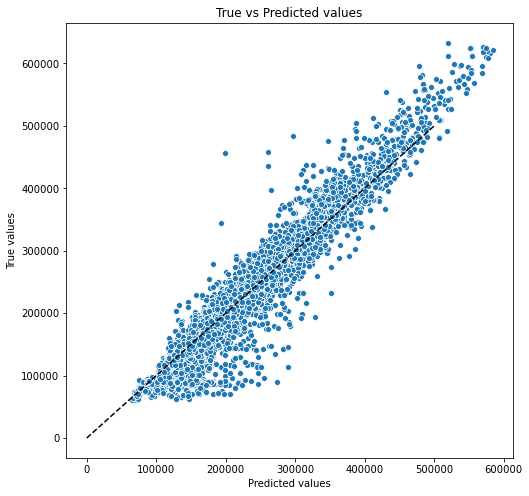

In [76]:
# Модель регрессии на основе случайного леса улучшила r2 до ~0,75
rf_model = RandomForestRegressor(criterion='mse',
                                 max_depth=12, # глубина дерева  
                                 #min_samples_leaf=10, # минимальное кол-во наблюдений в листе дерева
                                 random_state=27,
                                 max_features = 8, 
                                 n_estimators=200  # кол-во деревьев
                                 )
rf_model.fit(X_train, y_train)
y_train_preds = rf_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.756
RMSE:	46436.277
MSE:	2156327805.211


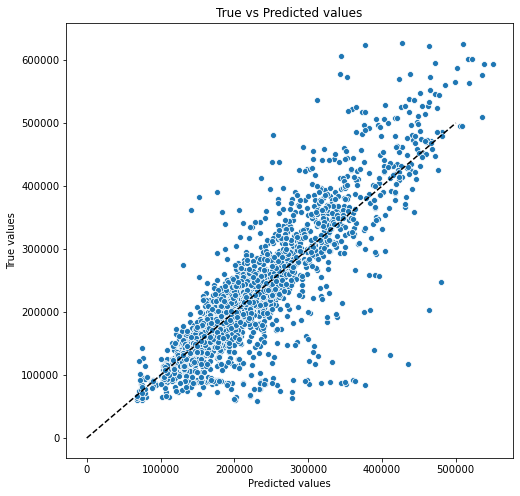

In [77]:
y_test_preds = rf_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

In [78]:
rf_cv_score = cross_val_score(rf_model, X, y, scoring='r2', cv=KFold(n_splits=3, shuffle=True, random_state=100))
print(rf_cv_score, ". Среднее значение - ", rf_cv_score.mean())

[0.74850971 0.73654475 0.77436779] . Среднее значение -  0.7531407511337526


In [ ]:
#Подбор параметров для модели градиентного бустинга показал лучшие параметры: {'max_depth': 8, 'min_samples_leaf': 20, 'n_estimators': 100}

#parameters = [{'n_estimators': [100], 
#               'min_samples_leaf': [20, 30, 50], 
#               'max_depth': [6, 7, 8]}]

#grid_search = GridSearchCV(estimator = RandomForestRegressor(random_state=27), 
#                           param_grid = parameters, cv=3)

#grid_search.fit(X_train, y_train)

In [ ]:
#grid_search.best_params_

In [ ]:
#cv_results = pd.DataFrame(grid_search.cv_results_)
#cv_results.columns

In [ ]:
#param_columns = [
#    column
#    for column in cv_results.columns
#    if column.startswith('param_')
#]

#score_columns = ['mean_test_score', 'rank_test_score']

#cv_results = (cv_results[param_columns + score_columns]
#             .sort_values(by=score_columns, ascending=False))

#cv_results.head(10)

R2:	0.881
RMSE:	31798.219
MSE:	1011126736.834


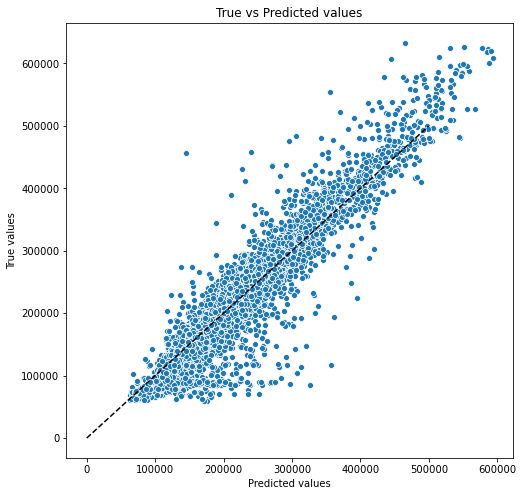

In [35]:
#На тренировочной выборке модель показала высокий R2: 0.89

#gb_model = GradientBoostingRegressor(criterion='mse',
#                                     max_depth=8,
#                                     min_samples_leaf=20,
#                                     random_state=27,  
#                                     n_estimators=100)
#gb_model.fit(X_train, y_train)

#y_train_preds = gb_model.predict(X_train)
#evaluate_preds(y_train, y_train_preds)

R2:	0.766
RMSE:	45637.86
MSE:	2082814225.624


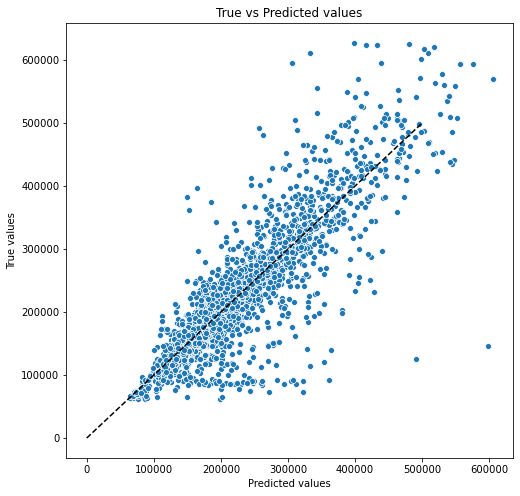

In [36]:
#На тествой выборке R2: 0.77, что значительно меньше и говорит о переобучении, изменение параметров не улучшало модель

#y_test_preds = gb_model.predict(X_test)
#evaluate_preds(y_test, y_test_preds)

In [37]:
# Даже с учетом подбора параметров модель градиентного бустинга заметно переобучается и показывает высокий R2 только
# на тренировочном датасете, 
# при этом на тестовом датасете R2 немногим выше, чем в модели регрессии на основе случайного леса. 
# За основу возьмем именно ее

#cv_score = cross_val_score(gb_model, X, y, scoring='r2', cv=KFold(n_splits=3, shuffle=True, random_state=100))
#print(cv_score, ". Среднее значение - ", cv_score.mean())

[0.74579043 0.73409631 0.77103183] . Среднее значение -  0.7503061910310235


In [84]:
# Как и в матрице корреляций определяющее влияние на цену квартиры влияет ее площадь и сгенерированные признаки - 
# средний уровень цен на районе и средняя площадь в расчете на комнату
feature_importances = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
15,MedPriceByDistrict,0.400181
1,Square,0.175037
16,MedPriceBySqm,0.118381
0,Rooms,0.072403
13,SquarePerRoom,0.040301
2,KitchenSquare,0.036198
8,Social_1,0.031574
5,HouseYear,0.023735
4,HouseFloor,0.018954
3,Floor,0.018477


In [79]:
# Применение модели RF на тестовом датасете

test_df.head()

,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,age_category,Ecology_1,Social_1,Social_3,Helthcare_2,Shops_2,housefloor_category,SquarePerRoom,IsDistrictLarge,MedPriceByDistrict,MedPriceBySqm,one_room
0,1.0,36.847630,5.000000,5.0,9.0,1970,0,0.036122,24,0,1,1,1,36.847630,1,171145.171875,4718.538086,0
1,1.0,42.493908,10.000000,7.0,17.0,2017,0,0.072158,2,1,0,0,3,42.493908,1,129107.218750,2567.609375,0
2,2.0,52.513309,9.000000,19.0,19.0,1977,0,0.211401,9,0,0,1,3,26.256655,1,165683.078125,2818.116211,0
3,3.0,49.646030,6.000000,2.0,2.0,1965,4,0.014073,2,0,0,1,0,16.548677,1,166687.734375,2355.893799,0
4,1.0,52.513309,6.337728,8.0,17.0,1977,0,0.309479,35,4,0,1,3,52.513309,1,165071.828125,3314.683838,1


In [80]:
test_df = test_df[feature_main]

In [81]:
preds = rf_model.predict(test_df)
preds

array([168498.6660498 , 128110.75955584, 143606.5078593 , ...,
       146249.3185499 , 178240.4391188 , 280053.09467837])

In [82]:
submit = pd.read_csv('./real_estate/sample_submission.csv')
submit['Price'] = preds
submit.head()

,Id,Price
0,4567,168498.666050
1,5925,128110.759556
2,960,143606.507859
3,3848,160529.319141
4,746,167425.239034


In [83]:
submit.to_csv('./real_estate/morozova_submit.csv', index=False)